In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as manimation

MovieWriter stderr:
Unknown encoder 'h264'



CalledProcessError: Command '['ffmpeg', '-f', 'rawvideo', '-vcodec', 'rawvideo', '-s', '600x400', '-pix_fmt', 'rgba', '-r', '15', '-loglevel', 'error', '-i', 'pipe:', '-vcodec', 'h264', '-pix_fmt', 'yuv420p', '-metadata', 'title=Movie Test', '-metadata', 'artist=Matplotlib', '-metadata', 'comment=a red circle following a blue sine wave', '-y', 'writer_test.mp4']' returned non-zero exit status 1.

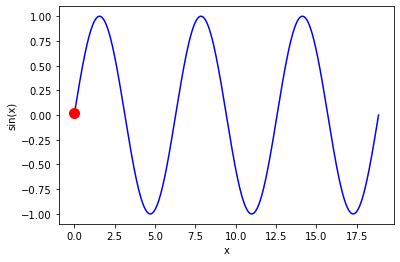

In [2]:
n = 1000
x = np.linspace(0, 6*np.pi, n)
y = np.sin(x)

# Define the meta data for the movie
FFMpegWriter = manimation.writers['ffmpeg']
metadata = dict(title='Movie Test', artist='Matplotlib',
                comment='a red circle following a blue sine wave')
writer = FFMpegWriter(fps=15, metadata=metadata)

# Initialize the movie
fig = plt.figure()

# plot the sine wave line
sine_line, = plt.plot(x, y, 'b')
red_circle, = plt.plot([], [], 'ro', markersize = 10)
plt.xlabel('x')
plt.ylabel('sin(x)')

# Update the frames for the movie
with writer.saving(fig, "writer_test.mp4", 100):
    for i in range(n):
        x0 = x[i]
        y0 = y[i]
        red_circle.set_data(x0, y0)
        writer.grab_frame()